In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [2]:
data = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data.head(6)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38


In [4]:
data.shape

(768, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [9]:
features= data.iloc[:, : -2]
predictions= data.iloc[:, -2]
features.head(6)

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0


In [10]:
predictions.head(6)

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
5    21.46
Name: Y1, dtype: float64

In [41]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
features_scaled= scaler.fit_transform(features)
features_scaled=pd.DataFrame(features_scaled, columns= features.columns)
features_scaled.head(6)

,X1,X2,X3,X4,X5,X6,X7,X8
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575
5,1.284979,-1.229239,0.000000,-1.198678,1.0,-0.447214,-1.760447,-1.814575


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(features_scaled, predictions, test_size= 0.2, random_state= 42, shuffle= True)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (614, 8)
y_train shape: (614,)


In [43]:
Train_data = pd.concat([X_train, y_train], axis='columns')  # Join along the columns
Train_data.columns = list(features.columns) + ["Y1"]
Train_data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1
60,0.528182,-0.672602,0.000000,-0.655880,1.0,-1.341641,-1.009323,-1.169393,23.53
618,-1.174613,1.275625,0.561951,0.972512,-1.0,0.447214,1.244049,-0.524211,18.90
346,0.906580,-0.950920,-0.561951,-0.655880,1.0,0.447214,0.117363,-0.524211,29.27
294,1.284979,-1.229239,0.000000,-1.198678,1.0,0.447214,0.117363,-1.169393,32.84
231,-0.985413,0.997307,0.000000,0.972512,-1.0,1.341641,-1.009323,0.766154,11.43


In [44]:
Train_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,-0.023547,0.024100,0.007322,0.019964,-0.016287,0.010197,0.007875,-0.008275,22.155033
std,0.997305,1.001505,0.993988,0.996094,1.000683,0.991593,1.007649,1.001263,10.054280
min,-1.363812,-1.785875,-1.685854,-1.470077,-1.000000,-1.341641,-1.760447,-1.814575,6.010000
25%,-0.985413,-0.672602,-0.561951,-0.655880,-1.000000,-0.447214,-1.009323,-1.008097,12.977500
50%,-0.228616,0.162352,0.000000,0.972512,-1.000000,0.447214,0.117363,0.120972,18.250000
75%,0.528182,0.997307,0.561951,0.972512,1.000000,0.447214,1.244049,0.766154,31.545000
max,2.041777,1.553943,2.247806,0.972512,1.000000,1.341641,1.244049,1.411336,43.100000


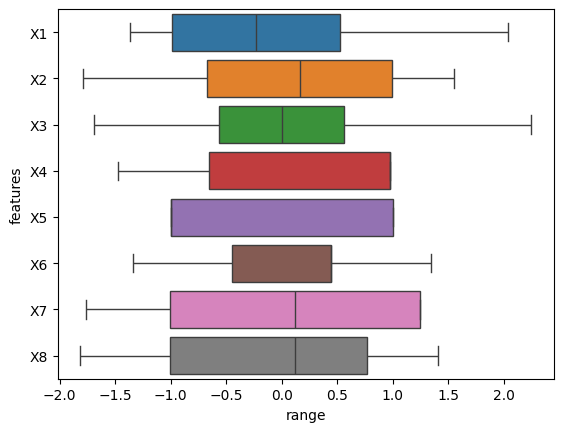

In [45]:
import seaborn as sns
sns.boxplot(data = X_train, orient= "h").set(xlabel="range", ylabel="features")
plt.show()

In [46]:
corr_mat= Train_data.corr(method='pearson')
corr_mat

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
X1,1.000000,-0.991923,-0.211912,-0.870389,0.831108,-0.003444,0.009575,0.001160,0.629314
X2,-0.991923,1.000000,0.204776,0.881746,-0.860752,0.005307,-0.012996,-0.001782,-0.664684
X3,-0.211912,0.204776,1.000000,-0.281167,0.267395,0.014898,-0.019823,-0.012122,0.439092
X4,-0.870389,0.881746,-0.281167,1.000000,-0.972779,-0.001977,-0.003189,0.004095,-0.863294
X5,0.831108,-0.860752,0.267395,-0.972779,1.000000,-0.007185,0.003697,-0.007357,0.889154
X6,-0.003444,0.005307,0.014898,-0.001977,-0.007185,1.000000,0.029363,0.010337,0.001772
X7,0.009575,-0.012996,-0.019823,-0.003189,0.003697,0.029363,1.000000,0.206917,0.276184
X8,0.001160,-0.001782,-0.012122,0.004095,-0.007357,0.010337,0.206917,1.000000,0.080206
Y1,0.629314,-0.664684,0.439092,-0.863294,0.889154,0.001772,0.276184,0.080206,1.000000


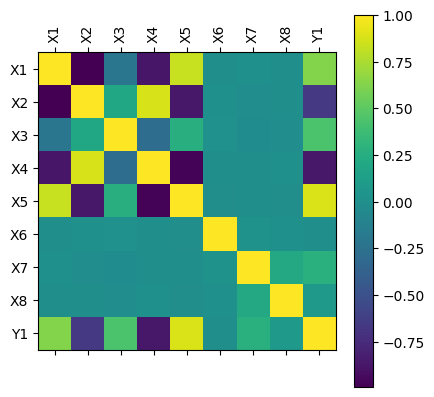

In [47]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)),corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)),corr_mat.columns)
plt.colorbar()
plt.show()

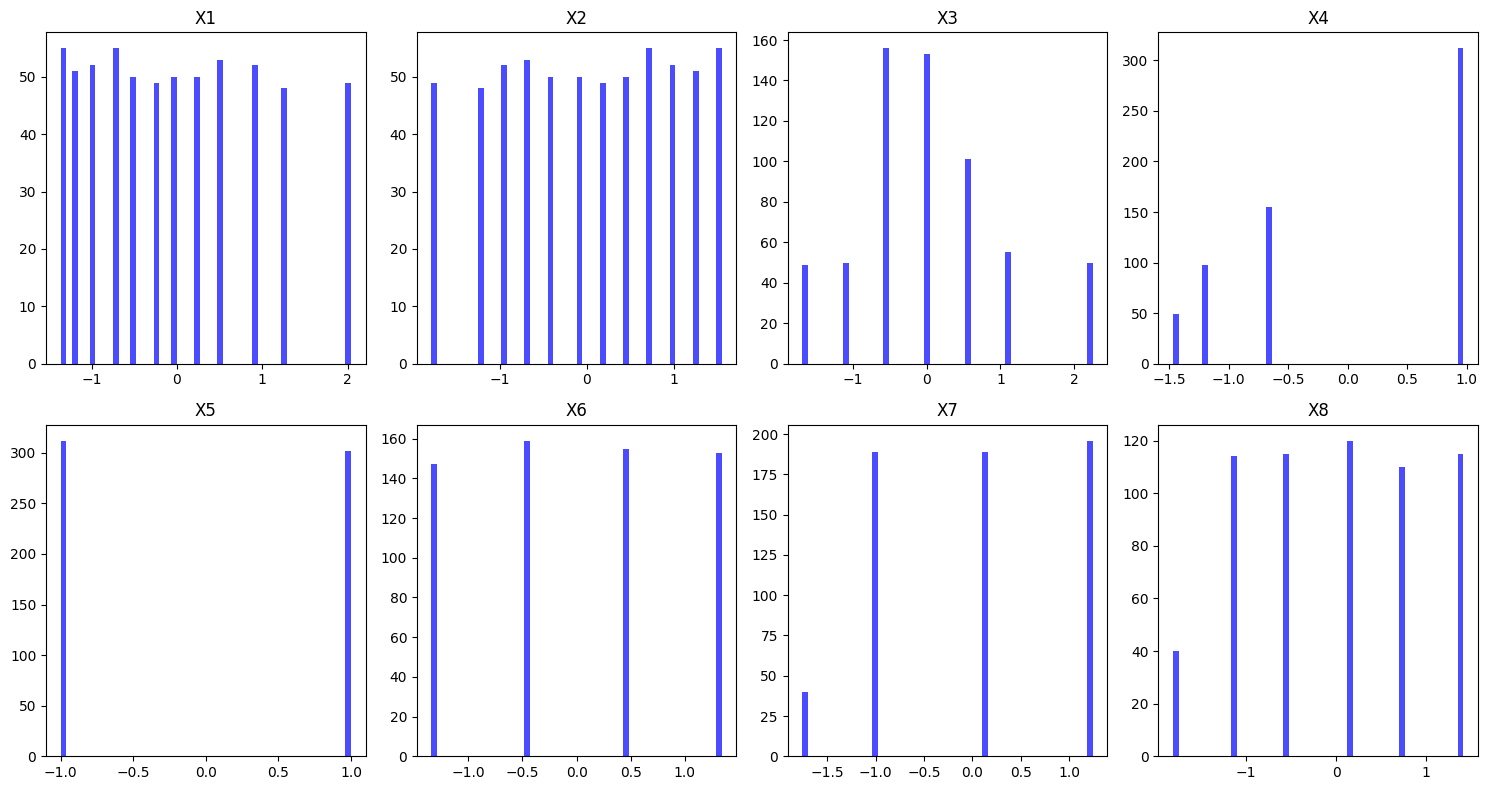

In [51]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
axs = axs.flatten()

# Loop through the columns and create histograms
for i, col in enumerate(Train_data.columns[:-1]):  # Exclude the target column
    axs[i].hist(Train_data[col], bins=50, color='blue', alpha=0.7)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [52]:
unique_values= Train_data.nunique()
unique_values

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    490
dtype: int64

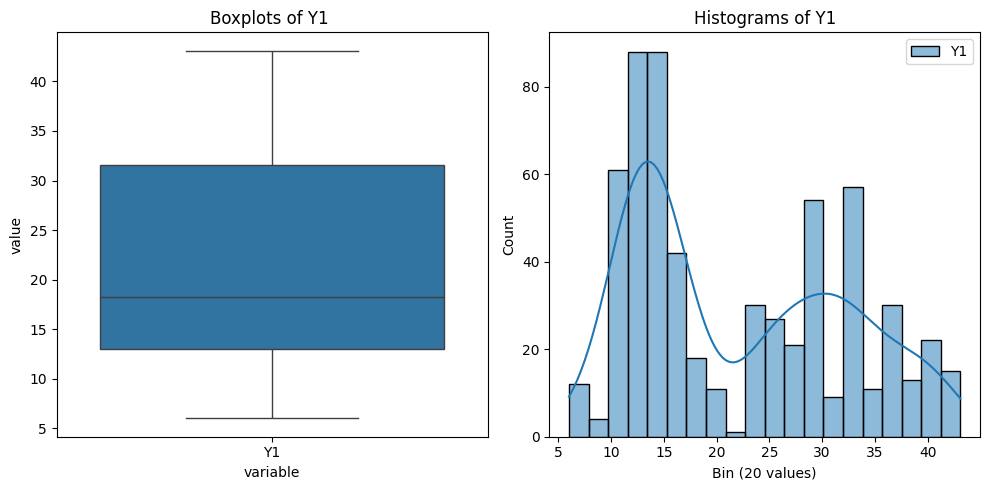

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs = axs.flatten()

# Boxplots
sns.boxplot(x="variable", y="value", data=pd.melt(Train_data[["Y1"]]), ax=axs[0])
axs[0].set_title("Boxplots of Y1 ")

# Histograms
sns.histplot(data=Train_data[["Y1"]], ax=axs[1], bins=20, kde=True)
axs[1].set(xlabel='Bin (20 values)')
axs[1].set_title("Histograms of Y1")

plt.tight_layout()
plt.show()


In [57]:
from sklearn.neighbors import KNeighborsRegressor
model= knn= KNeighborsRegressor(n_neighbors=6)
model.fit(X_train,y_train)
y_pred_train= model.predict(X_train)
y_pred= model.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train= mean_squared_error(y_train, y_pred_train)
mae_train=mean_absolute_error(y_train, y_pred_train)
r2_train=r2_score(y_train,y_pred_train)

print("mse train: ", mse_train)
print("mae train: ", mae_train)
print("r2 train: ", r2_train)

mse train:  3.8230142508143317
mae train:  1.2696579804560262
r2 train:  0.9621198369755405


In [60]:
mse_test= mean_squared_error(y_test, y_pred)
mae_test=mean_absolute_error(y_test, y_pred)
r2_test=r2_score(y_test,y_pred)

print("Evaluation Matrix: \n")
print("mse test: ", mse_test)
print("mae test: ", mae_test)
print("r2 test: ", r2_test)

Evaluation Matrix: 

mse test:  5.199351759740258
mae test:  1.505655844155844
r2 test:  0.9501177052745498


In [62]:
X_train_selected= X_train.drop(["X6", "X8"], axis= 1, inplace= False)
X_test_selected= X_test.drop(["X6", "X8"], axis= 1, inplace= False)

In [68]:
model_selected= knn= KNeighborsRegressor(n_neighbors=6)
model_selected.fit(X_train_selected,y_train)
y_pred_train_selected= model_selected.predict(X_train_selected)
y_pred_test_selected= model_selected.predict(X_test_selected)

# Check the shape of y_test and y_pred_train_selected
print("y_test shape:", y_test.shape)
print("y_pred_train_selected shape:", y_pred_train_selected.shape)

# If they don't match, you may need to split your data correctly or recalculate predictions
# Ensure X_test is the same data used for prediction
# Example:
# X_test = X_train[selected_indices]  # Assuming 'selected_indices' is the correct test data

# Then, generate predictions using the same model and X_test
y_pred_train_selected = model.predict(X_test)

# Now, y_pred_train_selected should have the same shape as y_test
print("Updated y_pred_train_selected shape:", y_pred_train_selected.shape)

# Calculate the R-squared score
r2_train_selected = r2_score(y_test, y_pred_train_selected)
print("R-squared score for updated predictions:", r2_train_selected)


y_test shape: (154,)
y_pred_train_selected shape: (614,)
Updated y_pred_train_selected shape: (154,)
R-squared score for updated predictions: 0.9501177052745498


In [70]:
r2_train_selected=r2_score(y_test,y_pred_train_selected)
print("r2 test: ", r2_train_selected)

r2_test_selected=r2_score(y_test,y_pred_test_selected)
print("r2 test: ", r2_test_selected)


r2 test:  0.9501177052745498
r2 test:  0.9926248224537108


In [85]:
from sklearn.linear_model import LogisticRegression
X= np.array([110,110,123,207,236])
y= np.array([0,0,0,1,1])
X = X.reshape(-1, 1)

model= LogisticRegression()
model.fit(X,y)



LogisticRegression()

In [86]:
x_test = np.array([198]).reshape(-1, 1)  # Replace 42 with your test data
y_pred = model.predict(x_test)
print(y_pred[0])


1


In [88]:
print("intercept: ",model.intercept_)
print("coefficient:" ,model.coef_)

intercept:  [-25.5044376]
coefficient: [[0.15387904]]


In [93]:
X= np.array([39,47,28,15,24])
y= np.array([1,1,1,0,0])
X = X.reshape(-1, 1)

model= LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [96]:
x_test= np.array([30]).reshape(-1, 1)
y_pred= model.predict(x_test)
y_pred[0]

1

In [143]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
#Print
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [144]:
df.shape

(150, 5)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [146]:
np.unique(df['species'])


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [147]:
class_dict= {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['species']= df['species'].map(class_dict)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [156]:
feature= df.iloc[:, : -1]
prediction= df.iloc[:, -1]
feature.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [157]:
prediction.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [158]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
feature_scaled= scaler.fit_transform(feature)
feature_scaled= pd.DataFrame(feature_scaled, columns= feature.columns)
feature_scaled.head()


,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [159]:
print(prediction.head())
print("Shape of feature_scaled:", feature_scaled.shape)
print("Shape of prediction:", prediction.shape)


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64
Shape of feature_scaled: (150, 4)
Shape of prediction: (150,)


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_scaled, prediction, test_size=0.2, random_state=50, shuffle=True)


In [162]:
Train_data= pd.concat([X_train,y_train], axis= 'columns', names=[features.columns, 'species'])
Train_data

,sepal_length,sepal_width,petal_length,petal_width,species
125,1.643844,0.337848,1.274550,0.790591,2
98,-0.900681,-1.281972,-0.431421,-0.129720,1
73,0.310998,-0.587764,0.535296,0.001753,1
144,1.038005,0.569251,1.103953,1.710902,2
21,-0.900681,1.494863,-1.284407,-1.050031,0
...,...,...,...,...,...
70,0.068662,0.337848,0.592162,0.790591,1
132,0.674501,-0.587764,1.047087,1.316483,2
33,-0.416010,2.651878,-1.341272,-1.312977,0
109,1.643844,1.263460,1.331416,1.710902,2


In [163]:
Train_data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,-0.063613,0.008099,-0.028149,-0.023446,1.000000
std,1.000533,0.999773,1.000192,0.997969,0.830106
min,-1.870024,-2.438987,-1.568735,-1.444450,0.000000
25%,-0.900681,-0.587764,-1.284407,-1.181504,0.000000
50%,-0.113090,-0.124958,0.279400,0.133226,1.000000
75%,0.674501,0.627102,0.762759,0.790591,2.000000
max,2.249683,3.114684,1.672610,1.710902,2.000000


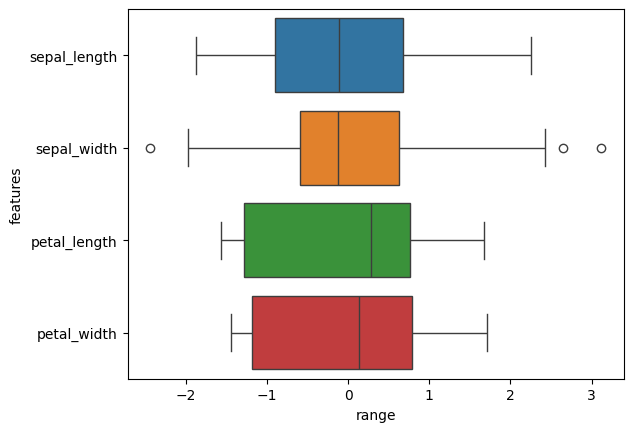

In [164]:
import seaborn as sns
sns.boxplot(data=X_train,orient="h").set(xlabel="range", ylabel="features")
plt.show()

In [172]:
def get_outliers_IQR(X):
    q1= np.quantile(X, 0.25)
    q3= np.quantile(X, 0.75)
    median= np.median(X)
    iqr= q3-q1
    upper_bound= q3+(1.5*iqr)
    lower_bound= q1-(1.5*iqr)
    outliers= X[(X<=lower_bound) | (X>=upper_bound)]
    outliers_indices= np.where((X<= lower_bound) | (X>=upper_bound))
    return outliers, outliers_indices[0].tolist()

In [174]:
Train_copy= Train_data.copy()
Train_copy.reset_index(drop= True, inplace= True)
outliers,outliers_indices= get_outliers_IQR(Train_copy['sepal_width'].to_numpy())
print("outliers: ", outliers)
print("outliers indices : " , outliers_indices)

outliers:  [ 3.11468391 -2.43898725  2.65187798]
outliers indices :  [22, 89, 117]


In [175]:
Train_copy.drop(outliers_indices, inplace= True)
Train_copy.reset_index(drop= True, inplace= True)
Train_copy

,sepal_length,sepal_width,petal_length,petal_width,species
0,1.643844,0.337848,1.274550,0.790591,2
1,-0.900681,-1.281972,-0.431421,-0.129720,1
2,0.310998,-0.587764,0.535296,0.001753,1
3,1.038005,0.569251,1.103953,1.710902,2
4,-0.900681,1.494863,-1.284407,-1.050031,0
...,...,...,...,...,...
112,1.038005,-0.124958,0.819624,1.447956,2
113,0.068662,0.337848,0.592162,0.790591,1
114,0.674501,-0.587764,1.047087,1.316483,2
115,1.643844,1.263460,1.331416,1.710902,2


In [176]:
Train_data.shape

(120, 5)

In [177]:
Train_copy.shape

(117, 5)

In [178]:
X_train= Train_copy.iloc[:, : -1]
y_train= Train_copy.iloc[: -1]

In [179]:
y_train

,sepal_length,sepal_width,petal_length,petal_width,species
0,1.643844,0.337848,1.274550,0.790591,2
1,-0.900681,-1.281972,-0.431421,-0.129720,1
2,0.310998,-0.587764,0.535296,0.001753,1
3,1.038005,0.569251,1.103953,1.710902,2
4,-0.900681,1.494863,-1.284407,-1.050031,0
...,...,...,...,...,...
111,-1.506521,1.263460,-1.568735,-1.312977,0
112,1.038005,-0.124958,0.819624,1.447956,2
113,0.068662,0.337848,0.592162,0.790591,1
114,0.674501,-0.587764,1.047087,1.316483,2


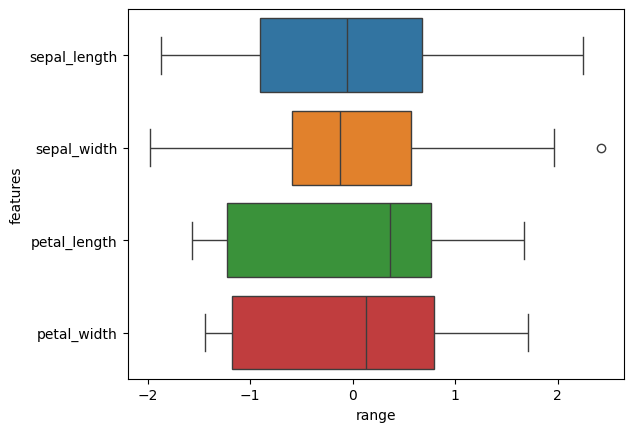

In [180]:
sns.boxplot(data= X_train, orient="h").set(xlabel="range", ylabel="features")
plt.show()

In [182]:
outliers, outliers_indices=get_outliers_IQR(Train_copy['sepal_width'].to_numpy())
print("outliers: ", outliers)
print("Outliers indices : ", outliers_indices)


outliers:  [2.42047502]
Outliers indices :  [46]


In [187]:
Train_copy.drop(outliers_indices, inplace=True, errors='ignore')
Train_copy.reset_index(drop=True, inplace=True)

Train_copy

,sepal_length,sepal_width,petal_length,petal_width,species
0,1.643844,0.337848,1.274550,0.790591,2
1,-0.900681,-1.281972,-0.431421,-0.129720,1
2,0.310998,-0.587764,0.535296,0.001753,1
3,1.038005,0.569251,1.103953,1.710902,2
4,-0.900681,1.494863,-1.284407,-1.050031,0
...,...,...,...,...,...
111,1.038005,-0.124958,0.819624,1.447956,2
112,0.068662,0.337848,0.592162,0.790591,1
113,0.674501,-0.587764,1.047087,1.316483,2
114,1.643844,1.263460,1.331416,1.710902,2


In [188]:
X_train= Train_copy.iloc[:, : -1]
y_train= Train_copy.iloc[:, -1]


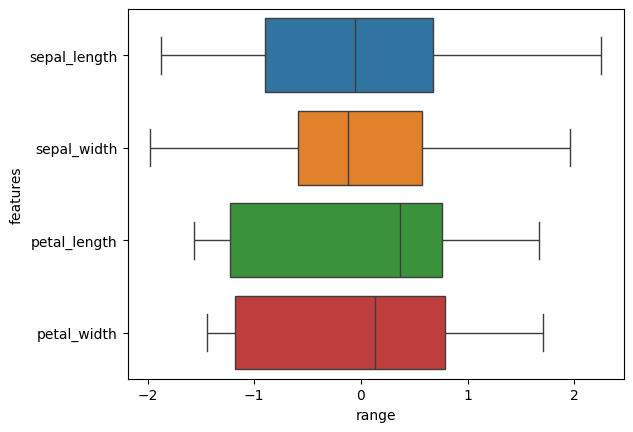

In [189]:
sns.boxplot(data= X_train, orient= "h").set(xlabel= "range", ylabel="features")
plt.show()

In [191]:
classes, count= np.unique(y_train, return_counts= True)
count

array([38, 37, 41], dtype=int64)

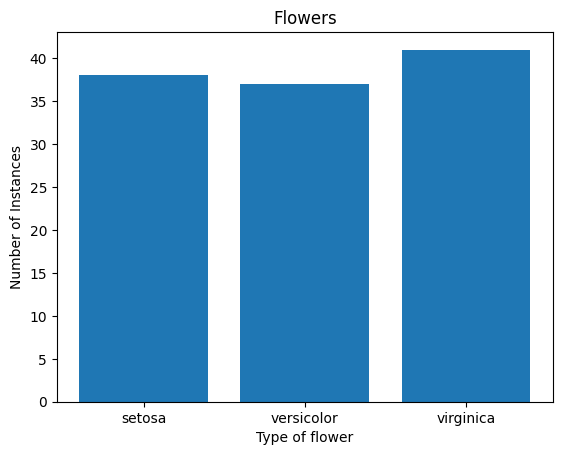

In [193]:
plt.bar(['setosa', 'versicolor', 'virginica'], count)
plt.title("Flowers")
plt.xlabel("Type of flower")
plt.ylabel("Number of Instances")
plt.show()

In [194]:
corr_mat= Train_copy.corr(method= 'pearson')
corr_mat

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.127313,0.883475,0.825971,0.793662
sepal_width,-0.127313,1.000000,-0.398315,-0.330258,-0.414335
petal_length,0.883475,-0.398315,1.000000,0.959186,0.948916
petal_width,0.825971,-0.330258,0.959186,1.000000,0.955052
species,0.793662,-0.414335,0.948916,0.955052,1.000000


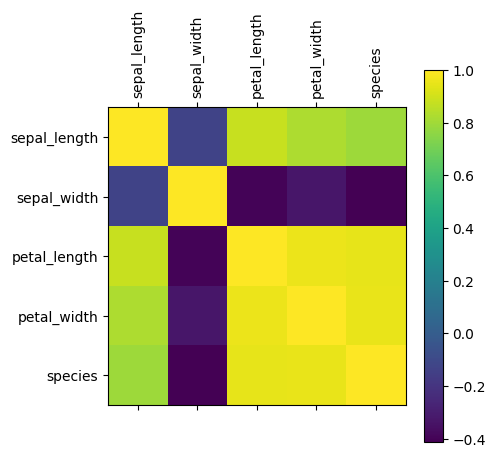

In [199]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)),corr_mat.columns, rotation= 90)
plt.yticks(range(len(corr_mat.columns)),corr_mat.columns)
# plt.fig(figsize= (6,6))
plt.colorbar()
plt.show()

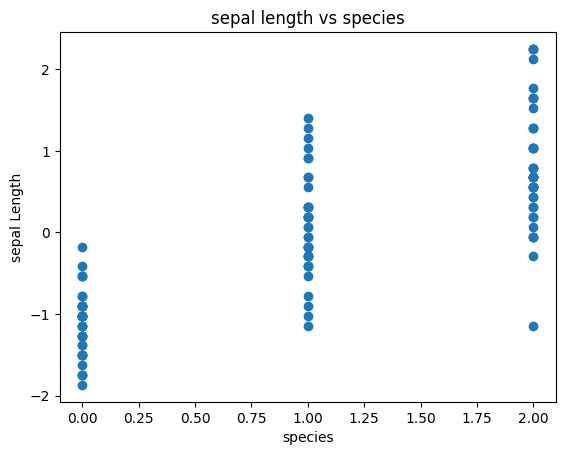

In [200]:
plt.scatter(y_train, X_train['sepal_length'])
plt.title("sepal length vs species")
plt.xlabel("species")
plt.ylabel("sepal Length")
plt.show()

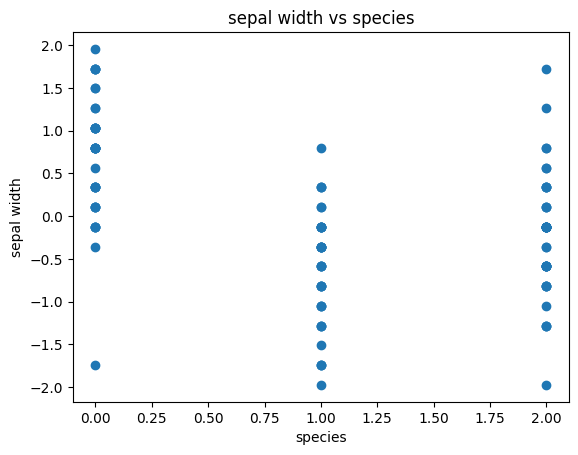

In [203]:
plt.scatter(y_train, X_train['sepal_width'])
plt.title("sepal width vs species")
plt.xlabel("species")
plt.ylabel("sepal width")
plt.show()
    

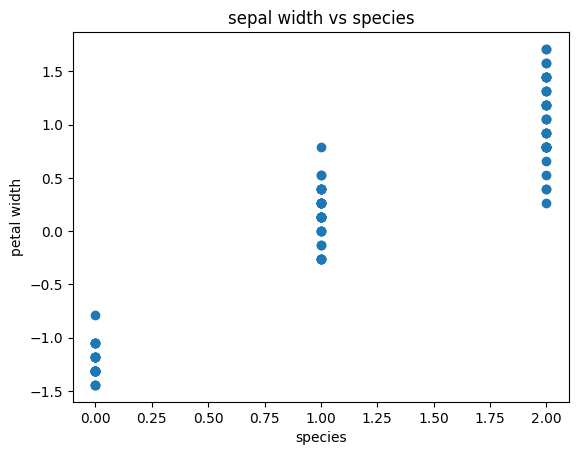

In [212]:
plt.scatter(y_train, X_train['petal_width'])
plt.title("sepal width vs species")
plt.xlabel("species")
plt.ylabel("petal width")
plt.show()

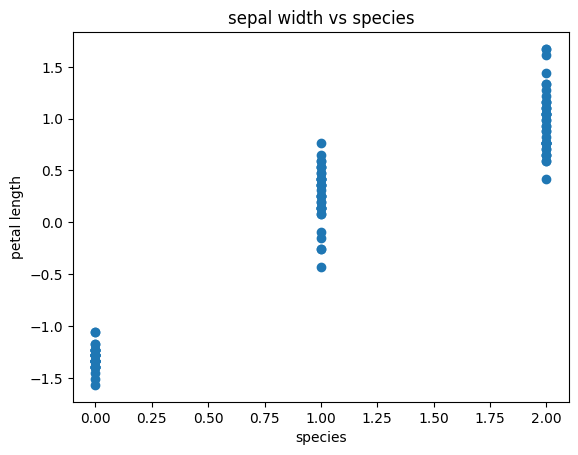

In [213]:
plt.scatter(y_train, X_train['petal_length'])
plt.title("sepal width vs species")
plt.xlabel("species")
plt.ylabel("petal length")
plt.show()

In [205]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state= 0)
model.fit(X_train, y_train)
y_pred_train= model.predict(X_train)
y_pred=model.predict(X_test)

In [211]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_train= accuracy_score(y_train, y_pred_train)
confusion_mat_train= confusion_matrix(y_train, y_pred_train)
print("\nTrain Data: ") 
print("accuracy train score: ", np.round(accuracy_train,decimals= 3))
print("confusion matrix: \n", confusion_mat_train)


accuracy_test= accuracy_score(y_test, y_pred)
confusion_mat= confusion_matrix(y_test, y_pred)
print("\nTest Data: ") 
print("accuracy test score: ", np.round(accuracy_test,decimals= 3))
print("confusion matrix: \n", confusion_mat)


Train Data: 
accuracy train score:  0.974
confusion matrix: 
 [[38  0  0]
 [ 0 35  2]
 [ 0  1 40]]

Test Data: 
accuracy test score:  0.933
confusion matrix: 
 [[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]
